Example 1. double-split inteference

In [ ]:
import suraida as sr
import numpy as np
import matplotlib.pyplot as plt

# The interference function
def double_slit_interference(x, wavelength, slit_width, slit_distance):
    """
    Compute the intensity of the interference pattern.
    
    x: Position on the screen
    wavelength: Wavelength of light
    slit_width: Width of the slits
    slit_distance: Distance between the slits
    """
    # Single-slit diffraction pattern (envelope)
    beta = (np.pi * slit_width * x) / wavelength
    envelope = np.sinc(beta / np.pi)**2
    
    # Double-slit interference pattern
    delta = (np.pi * slit_distance * x) / wavelength
    interference = (np.cos(delta))**2
    
    # Combined pattern
    return envelope * interference

# Using Manipulate to dynamically explore the simulation
double_slit = sr.Manipulate(
    double_slit_interference,
    ["x", -10, 10, 0.1],  # Range for x (screen position)
    [
        ["wavelength", 0.1, 2.0, 0.05],  # Wavelength of light
        ["slit_width", 0.1, 1.0, 0.05],  # Width of the slits
        ["slit_distance", 0.1, 2.0, 0.05]  # Distance between the slits
    ]
)


Dialog(children=[Card(children=[CardTitle(children=['Adjust Figure Settings'], layout=None), CardText(children…

Container(children=[Container(children=[Container(children=[Output(layout=Layout(overflow='hidden'))], class_=…

decorate your plot

In [6]:
# Modify the figure's axes labels and title
ax = fig.gca()  # Get the current axis
ax.set_title("Double Slit Interference Pattern", fontsize=16)  # Set the plot title with larger font size
ax.set_xlabel("Screen Position (x)", fontsize=16)  # Label for the x-axis with appropriate font size
ax.set_ylabel("Intensity", fontsize=10)  # Label for the y-axis with appropriate font size

# Optionally, adjust tick label font size for consistency
ax.tick_params(axis='both', labelsize=16)


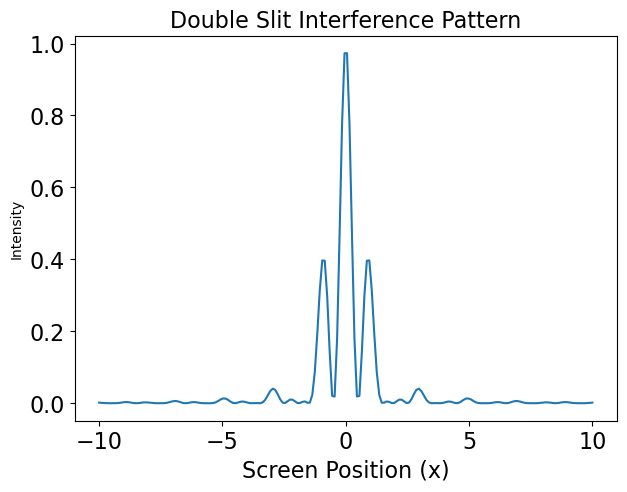

In [7]:
fig

Example 2. off-resonant rabi oscillation

In [8]:
import numpy as np
from qutip import *
def off_resonant_rabi(time, drive_amplitude, detuning):
    """
    Compute the excited state population for an off-resonant Rabi drive.
    
    time: Single time point (scalar).
    drive_amplitude: Rabi drive amplitude (strength of the drive).
    detuning: Detuning of the drive from the qubit's natural frequency.
    
    Returns:
    - Excited state population at a specific time.
    """
    # Define system parameters
    omega0 = 1.0  # Natural frequency of the qubit (arbitrary units)
    
    # Pauli operators for a two-level system
    sigma_x = sigmax()
    sigma_z = sigmaz()

    # Define Hamiltonian
    H_drive = drive_amplitude * sigma_x  # Drive Hamiltonian
    H_detuning = (detuning / 2) * sigma_z  # Detuning contribution
    H = H_drive + H_detuning

    # Initial state (ground state)
    psi0 = basis(2, 0)

    # Time evolution (using a single time point here)
    result = mesolve(H, psi0, [0, time], [], [sigmaz()])

    # Convert expectation value of sigma_z to excited state population
    sz_expect = result.expect[0][-1]  # Get the last value at `time`
    excited_state_population = (1 - sz_expect) / 2

    return excited_state_population


# Integrating with sr.Manipulate
rabi_drive = sr.Manipulate(
    off_resonant_rabi,   # Function to be dynamically adjusted
    ["time", 0, 10, 0.1],  # Range for time (simulation time points)
    [
        ["drive_amplitude", 0.1, 2.0, 0.1,2],  # Drive amplitude
        ["detuning", -1.0, 1.0, 0.1]         # Detuning
    ]
)


/Users/yunwei/Desktop/PycharmProjects/qutip/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


Dialog(children=[Card(children=[CardTitle(children=['Adjust Figure Settings'], layout=None), CardText(children…

Container(children=[Container(children=[Container(children=[Output(layout=Layout(overflow='hidden'))], class_=…

In [6]:
# compared with analytical results